<a href="https://colab.research.google.com/github/hrbolek/learning/blob/master/operanalyst/swarms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Optimalizace s využítím swarmů
Swarm - hejno se skládá s jedinců. Tito se pohybují prostorem a snaží se najít "nejlepší místo" o svém úspěchu dávají vědět dalším členům hejna - jedincům, kteří se rozhodují, zda a jak tuto informaci akceptují, speciálně s ohledem na skutečnost, že sami dosahují dílčích úspěchů v hledání.

[Wikipedie](https://cs.wikipedia.org/wiki/Optimalizace_hejnem_%C4%8D%C3%A1stic)

Pohyb členů hejna lze popsat rovnicemi

$x_{i}(t+1) = x_{i}(t) + v_{i}(t+1)$

a

$v_{i}(t + 1) = w * v_{i}(t) + c_{1}[y_{i}(t) − x_{i}(t)]
                   + c_{2}[\hat{y}(t) − x_{i}(t)]$

První rovnice popisuje změnu polohy, zatímco druhá změnu rychlosti pohybu jedince. Rovnice mají tři volitelné parametry

$w$ určuje míru odporu prostředí, snižuje rychlost pohybujícího se jedince obecně a zajišťuje tak stabilitu systému při řešení.

$c_{1}$ a $c_{2}$ jsou parametry určující kognitivní a společenské chování, tedy do jaké míry upřednostňuje jedinec své lokální optimum $y_{i}(t)$ před optimem $\hat{y}(t)$ , kterého dosáhlo celé hejno.

Kriteriální funkce

$z=f(x)$

je aplikovaná při každé iteraci na jedince s polohou $x_{i}(t)$, získané hodnoty jsou porovnávány s osobním optimem $f(y_{i}(t))$. Pokud nová hodnota je 
lepší, je $y_{i}(t)$ nastavena na $x_{i}(t)$, v opačném případě je ponechána původní hodnota. Poloha optima celého hejna $\hat{y}(t)$ je v každé iteraci počítána obdobně, tzn. vybere se poloha nejlepšího z osobních poloh.

$ X_{ij}(t+1) = \left\{\begin{array}{lr}
        0, & \text{if } \text{rand() } \geq S(v_{ij}(t+1))\\
        1, & \text{if } \text{rand() } < S(v_{ij}(t+1))
        \end{array}\right\}$

In [0]:
!pip install pyswarms

     |████████████████████████████████| 102kB 3.3MB/s 


2020-03-26 10:17:21,282 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best: 100%|██████████|100/100, best_cost=3.63e-7
2020-03-26 10:17:21,480 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 3.627645792100015e-07, best pos: [0.00055751 0.00022791]


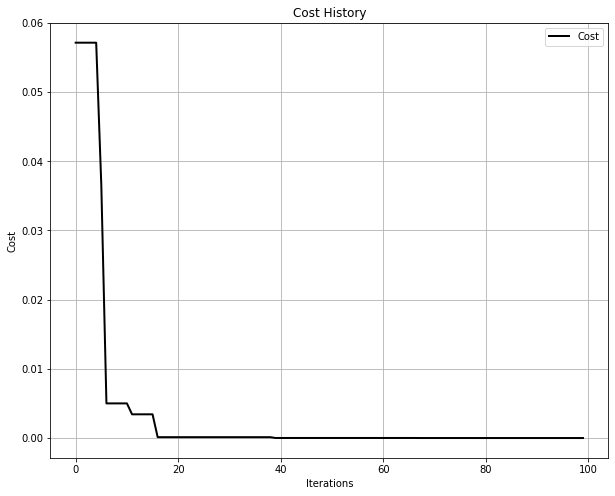

In [0]:
import matplotlib.pyplot as plt
import pyswarms as ps
from pyswarms.utils.functions.single_obj import sphere
from pyswarms.utils.plotters import plot_cost_history
from pyswarms.utils.functions import single_obj as fx

# Set up optimizer
options = {'c1':0.5, 'c2':0.3, 'w':0.9}
optimizer = ps.single.GlobalBestPSO(n_particles = 10, 
  dimensions = 2, options = options)

# Perform optimization
stats = optimizer.optimize(fx.sphere, iters = 100)

# Obtain cost history from optimizer instance
cost_history = optimizer.cost_history

# Plot!
plot_cost_history(cost_history)
plt.grid(which = 'both')
plt.show()
